<a href="https://colab.research.google.com/github/As1nth/skillcraftInternship-task3BankingOperationmanagement_DecisionTree_classifier/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn --quiet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import zipfile
import io
import requests

In [ ]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))
csv_file = z.open("bank-additional/bank-additional-full.csv")

df = pd.read_csv(csv_file, sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Dataset Shape: (41188, 21)

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
n

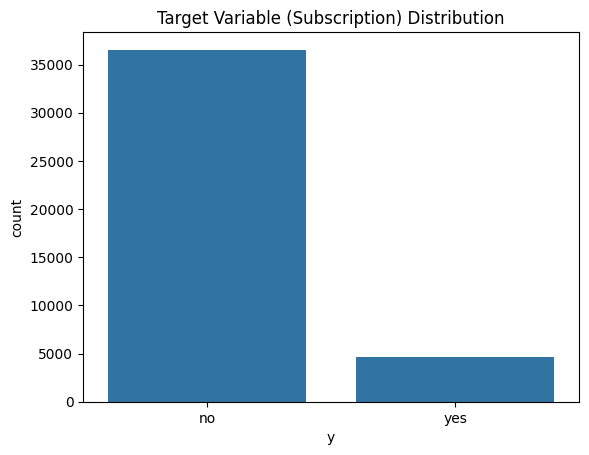

In [ ]:

print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

sns.countplot(data=df, x='y')
plt.title("Target Variable (Subscription) Distribution")
plt.show()


In [ ]:

df_clean = df.copy()
label_encoders = {}

for col in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le


X = df_clean.drop('y', axis=1)
y = df_clean['y']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

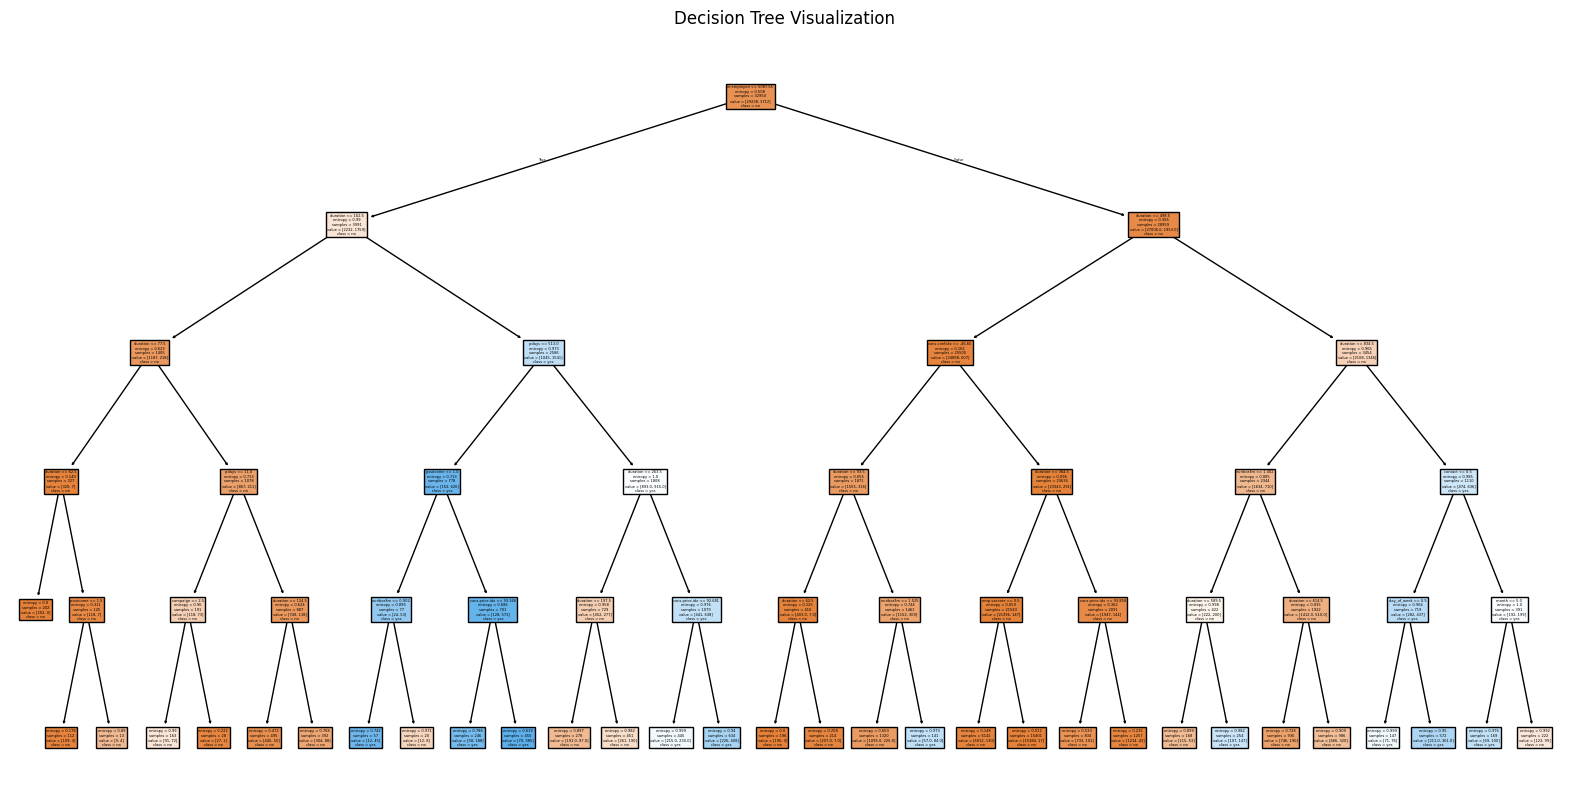

In [ ]:

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=label_encoders['y'].classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:

y_pred = dt.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoders['y'].classes_))


✅ Accuracy Score: 0.9175770818159747

📌 Confusion Matrix:
 [[7056  254]
 [ 425  503]]

📋 Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.97      0.95      7310
         yes       0.66      0.54      0.60       928

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.78      8238
weighted avg       0.91      0.92      0.91      8238

